In [1]:
import os

data_path = "/kaggle/input/uli-dataset/uli_dataset-main"
print(os.listdir(data_path))  


['LICENSE', 'training', 'README.md', 'testing']


Loading libraries

In [2]:
import pandas as pd
import os


In [3]:
train_path = os.path.join(data_path, "training")
print(os.listdir(train_path)) 
file_path="/kaggle/input/uli-dataset/uli_dataset-main/training/train_en_l1.csv"
df = pd.read_csv(file_path)



['train_en_l2.csv', 'train_ta_l1.csv', 'train_hi_l3.csv', 'train_hi_l1.csv', 'train_en_l1.csv', 'train_hi_l2.csv', 'train_ta_l2.csv', 'train_ta_l3.csv', 'train_en_l3.csv']


# EDA

In [4]:
df.info() #Checking Basic Information


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6531 entries, 0 to 6530
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    6531 non-null   object 
 1   key     6531 non-null   object 
 2   en_a1   131 non-null    float64
 3   en_a2   1273 non-null   object 
 4   en_a3   1847 non-null   object 
 5   en_a4   1074 non-null   object 
 6   en_a5   1799 non-null   float64
 7   en_a6   922 non-null    float64
dtypes: float64(3), object(5)
memory usage: 408.3+ KB


In [5]:
df.isnull().sum()

text        0
key         0
en_a1    6400
en_a2    5258
en_a3    4684
en_a4    5457
en_a5    4732
en_a6    5609
dtype: int64

In [6]:
df['key'].value_counts()


key
question_1    6531
Name: count, dtype: int64

In [7]:
df.duplicated().sum() 


0

In [8]:
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))
df['text_length'].describe()  

count    6531.000000
mean       19.626091
std        14.389788
min         1.000000
25%         8.000000
50%        15.000000
75%        29.000000
max        62.000000
Name: text_length, dtype: float64

In [9]:
import re
df['special_chars'] = df['text'].apply(lambda x: len(re.findall(r'[^A-Za-z0-9\s]', str(x))))
df['special_chars'].describe()


count    6531.000000
mean        7.126321
std         5.610655
min         0.000000
25%         3.000000
50%         6.000000
75%         9.000000
max        88.000000
Name: special_chars, dtype: float64

In [10]:

for col in df.columns[2:8]:  
    print(f"Column: {col} - Unique Values: {df[col].unique()}")

df.iloc[:, 2:8] = df.iloc[:, 2:8].replace(['NL'], None).astype(float).fillna(0)


df['text_length'] = pd.to_numeric(df['text_length'], errors='coerce').fillna(0).astype(int)
df['special_chars'] = pd.to_numeric(df['special_chars'], errors='coerce').fillna(0).astype(int)

df[['en_a2', 'en_a3', 'en_a4']] = df[['en_a2', 'en_a3', 'en_a4']].apply(pd.to_numeric, errors='coerce').fillna(0)


print(df.dtypes)


Column: en_a1 - Unique Values: [nan  0.  1.]
Column: en_a2 - Unique Values: [nan '0.0' '1.0' 'NL']
Column: en_a3 - Unique Values: [nan '0.0' '1.0' 'NL']
Column: en_a4 - Unique Values: [nan '1.0' '0.0' 'NL']
Column: en_a5 - Unique Values: [nan  0.  1.]
Column: en_a6 - Unique Values: [ 0. nan  1.]
text              object
key               object
en_a1            float64
en_a2            float64
en_a3            float64
en_a4            float64
en_a5            float64
en_a6            float64
text_length        int64
special_chars      int64
dtype: object


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.

===== EDA for train_en_l1.csv =====

Dataset shape: (6531, 8)

Data types:
 text      object
key       object
en_a1    float64
en_a2     object
en_a3     object
en_a4     object
en_a5    float64
en_a6    float64
dtype: object

Memory usage:
 Index        128
text     1747525
key       437577
en_a1      52248
en_a2     244634
en_a3     260699
en_a4     239063
en_a5      52248
en_a6      52248
dtype: int64

Sample rows:
                                                    text         key  en_a1  \
1997  <handle replaced>Again, if such a scripture is...  question_1    NaN   
5040  <handle replaced>has always been in hearts, an...  question_1    0.0   
4581  <handle replaced>Who is he to comment on Love ...  question_1    NaN   

     en_a2 en_a3 en_a4  en_a5  en_a6  
1997   0.0   NaN   NaN    NaN    NaN  
5040   NaN   NaN   NaN    0.0    NaN  
4581   NaN   0.0   NaN    NaN 

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


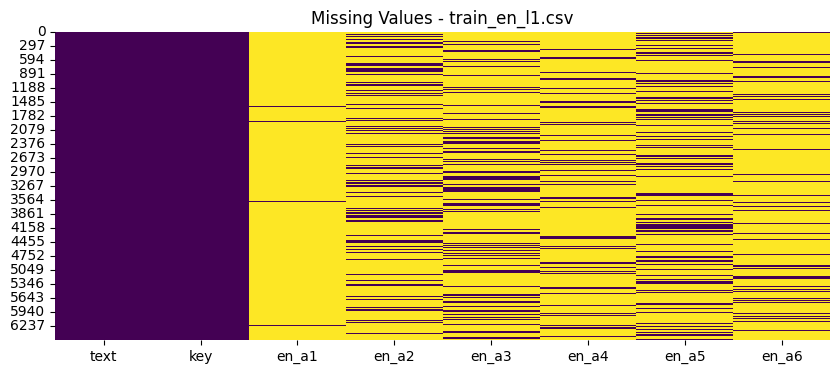


--- en_a1 ---
en_a1
0.0    6499
1.0      32
Name: count, dtype: int64


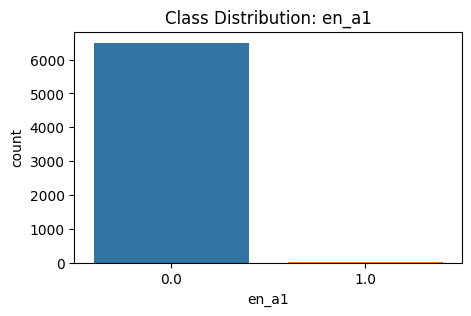

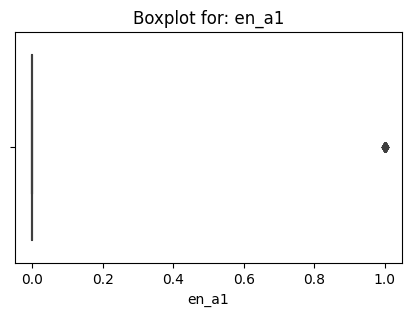


--- en_a2 ---
en_a2
0.0    6339
1.0     192
Name: count, dtype: int64


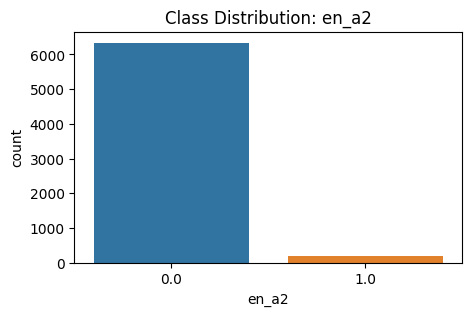

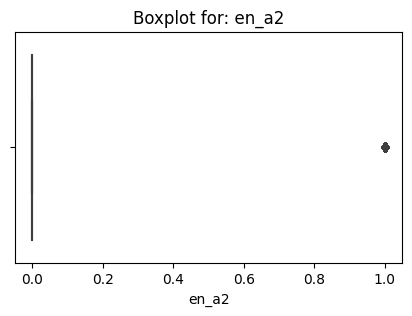


--- en_a3 ---
en_a3
0.0    5993
1.0     538
Name: count, dtype: int64


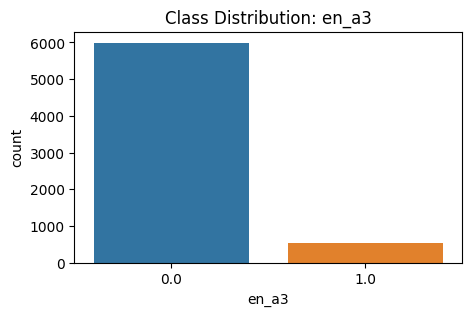

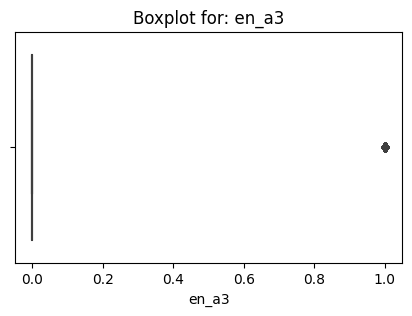


--- en_a4 ---
en_a4
0.0    6405
1.0     126
Name: count, dtype: int64


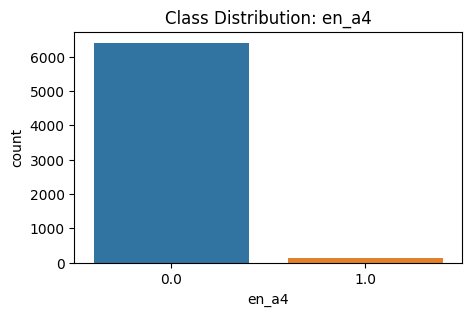

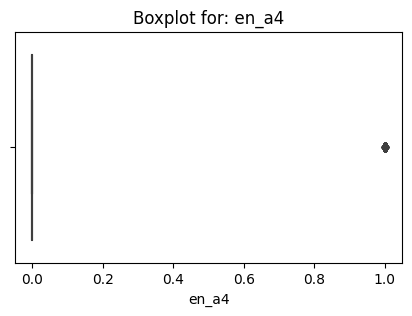


--- en_a5 ---
en_a5
0.0    6234
1.0     297
Name: count, dtype: int64


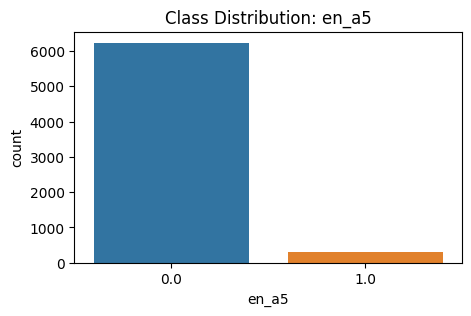

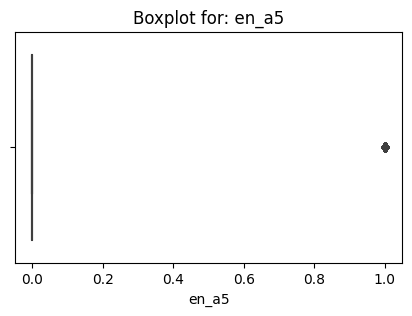


--- en_a6 ---
en_a6
0.0    6274
1.0     257
Name: count, dtype: int64


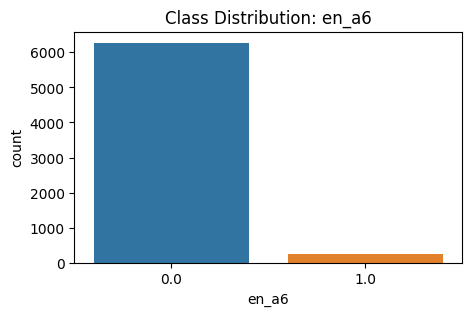

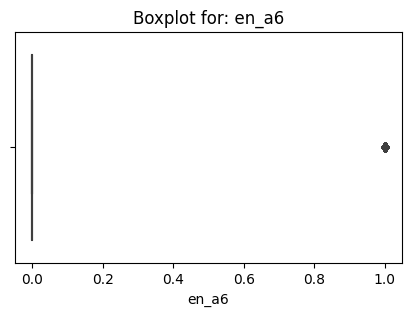

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


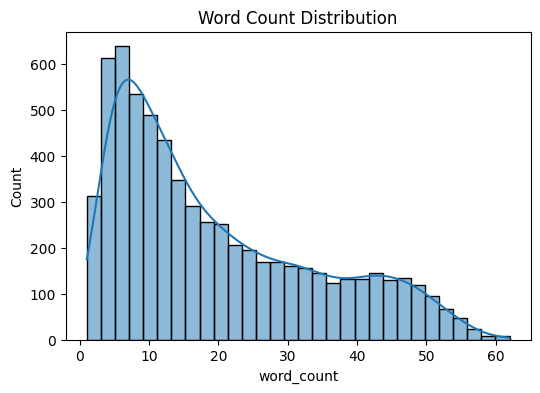

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


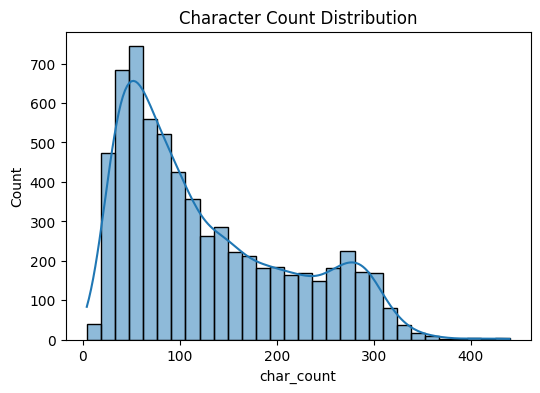

Avg stopwords per text: 6.8107487367937525


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


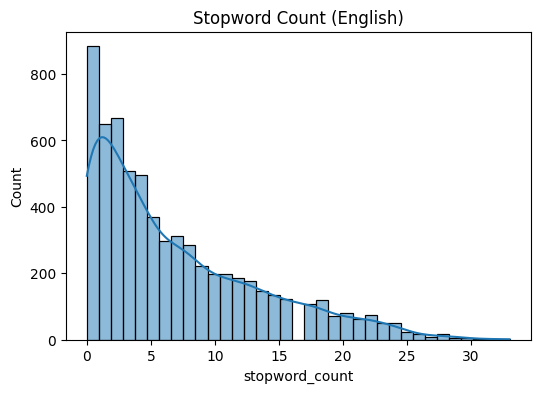

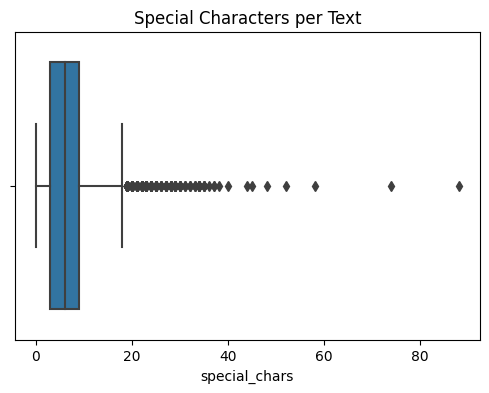

Exact duplicates: 0
Vocabulary size for EN: 23877

===== EDA for train_en_l2.csv =====

Dataset shape: (6531, 8)

Data types:
 text      object
key       object
en_a1    float64
en_a2     object
en_a3     object
en_a4     object
en_a5    float64
en_a6    float64
dtype: object

Memory usage:
 Index        128
text     1747525
key       437577
en_a1      52248
en_a2     244634
en_a3     260699
en_a4     239063
en_a5      52248
en_a6      52248
dtype: int64

Sample rows:
                                                    text         key  en_a1  \
5100       <handle replaced>is more attractive than poo  question_2    NaN   
3801  <handle replaced>She is a black widow spider. ...  question_2    NaN   
1076  <handle replaced><handle replaced>FUCK YOU MAS...  question_2    NaN   

     en_a2 en_a3 en_a4  en_a5  en_a6  
5100   NaN   NaN   0.0    NaN    NaN  
3801   0.0   NaN   NaN    NaN    NaN  
1076   NaN   NaN   NaN    1.0    NaN  

Missing values:
 text        0
key         0
en_a1    64

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


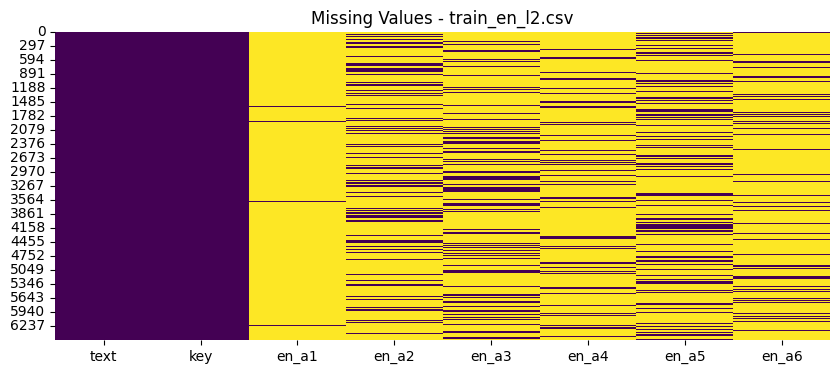


--- en_a1 ---
en_a1
0.0    6467
1.0      64
Name: count, dtype: int64


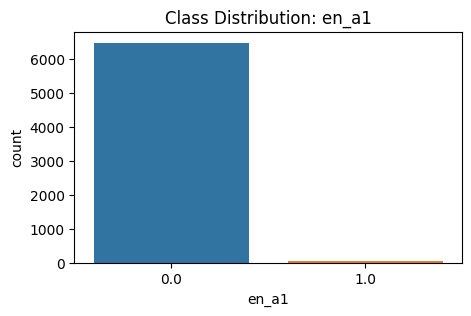

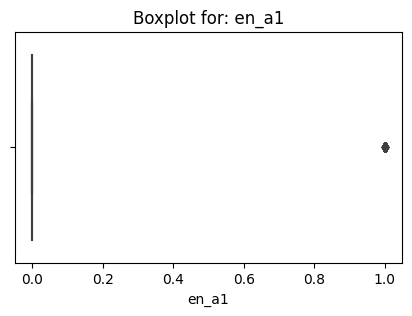


--- en_a2 ---
en_a2
0.0    6347
1.0     184
Name: count, dtype: int64


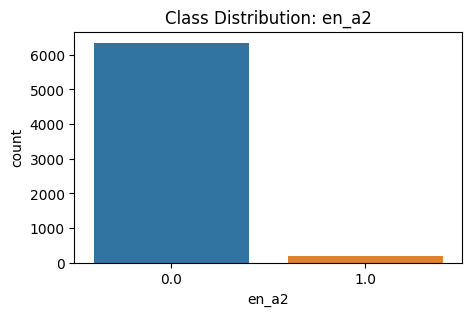

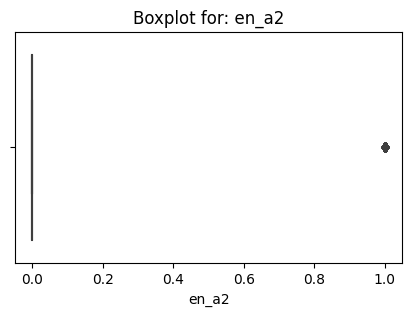


--- en_a3 ---
en_a3
0.0    5901
1.0     630
Name: count, dtype: int64


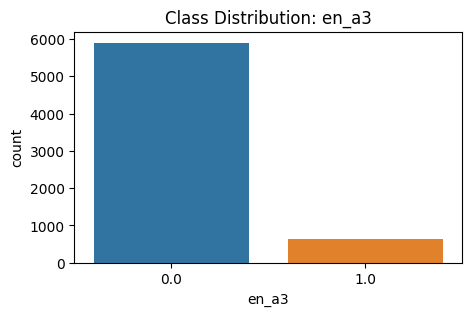

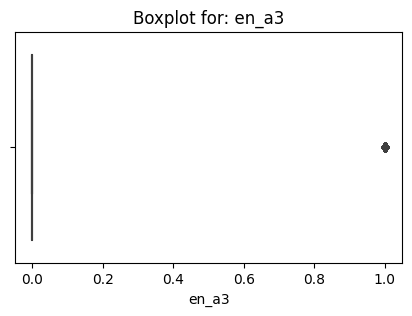


--- en_a4 ---
en_a4
0.0    6363
1.0     168
Name: count, dtype: int64


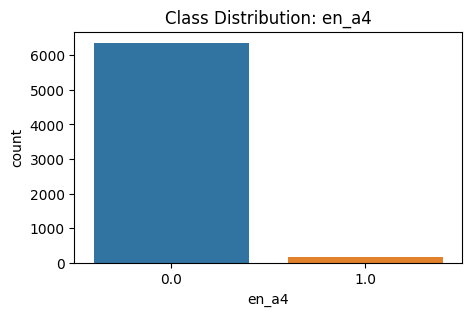

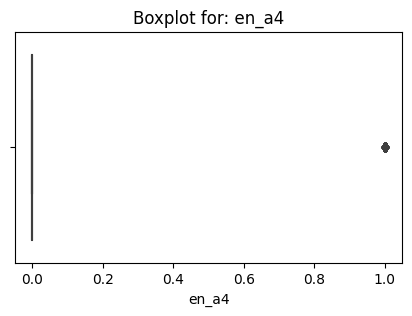


--- en_a5 ---
en_a5
0.0    5839
1.0     692
Name: count, dtype: int64


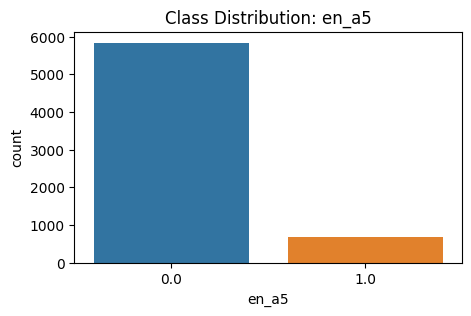

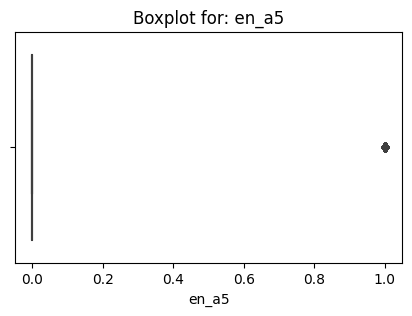


--- en_a6 ---
en_a6
0.0    5984
1.0     547
Name: count, dtype: int64


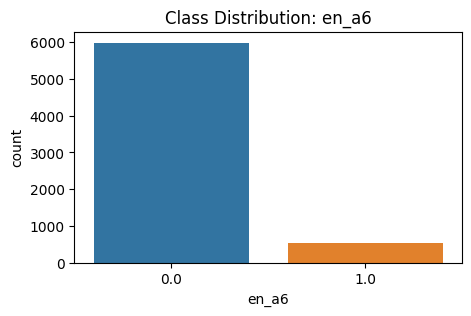

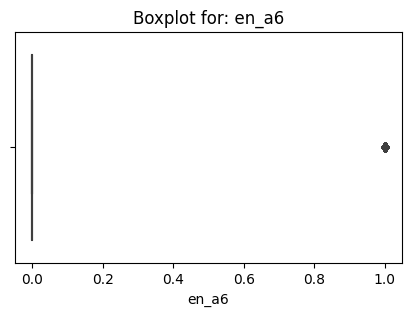

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


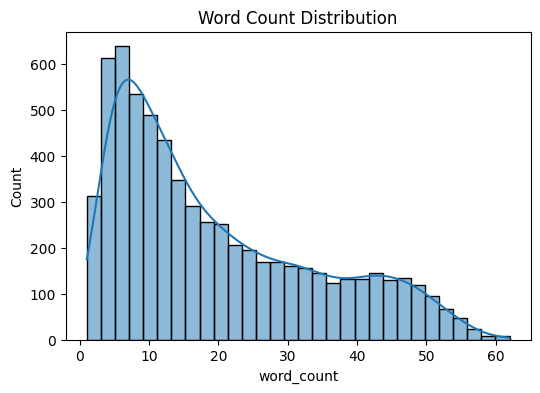

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


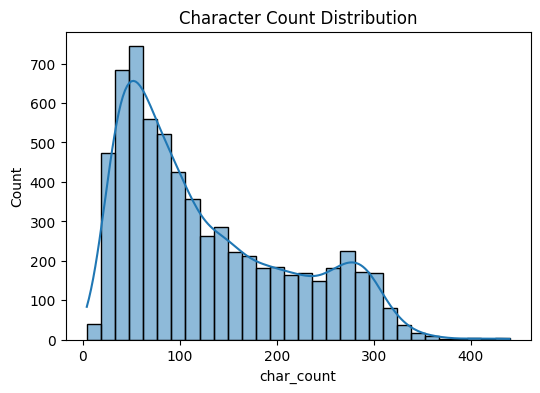

Avg stopwords per text: 6.8107487367937525


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


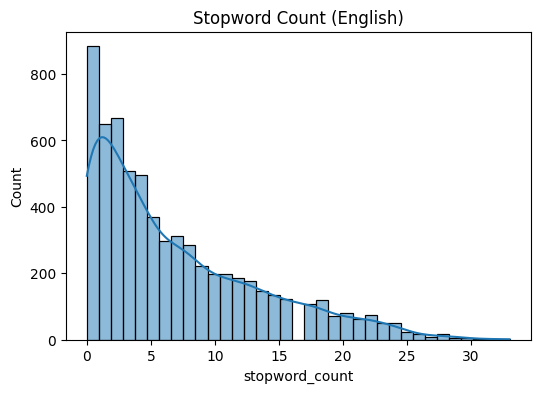

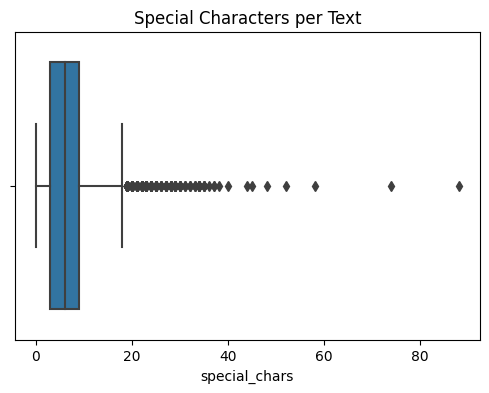

Exact duplicates: 0
Vocabulary size for EN: 23877

===== EDA for train_en_l3.csv =====

Dataset shape: (6531, 8)

Data types:
 text      object
key       object
en_a1    float64
en_a2     object
en_a3     object
en_a4     object
en_a5    float64
en_a6    float64
dtype: object

Memory usage:
 Index        128
text     1747525
key       437577
en_a1      52248
en_a2     244633
en_a3     260699
en_a4     239063
en_a5      52248
en_a6      52248
dtype: int64

Sample rows:
                                                    text         key  en_a1  \
6091  Some dumb sick people do not understand the sa...  question_3    NaN   
437   <handle replaced><handle replaced><handle repl...  question_3    NaN   
6179  This bitch really is the definition of a bird/...  question_3    NaN   

     en_a2 en_a3 en_a4  en_a5  en_a6  
6091   NaN   1.0   NaN    NaN    NaN  
437    NaN   NaN   NaN    NaN    1.0  
6179   0.0   NaN   NaN    NaN    NaN  

Missing values:
 text        0
key         0
en_a1    64

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


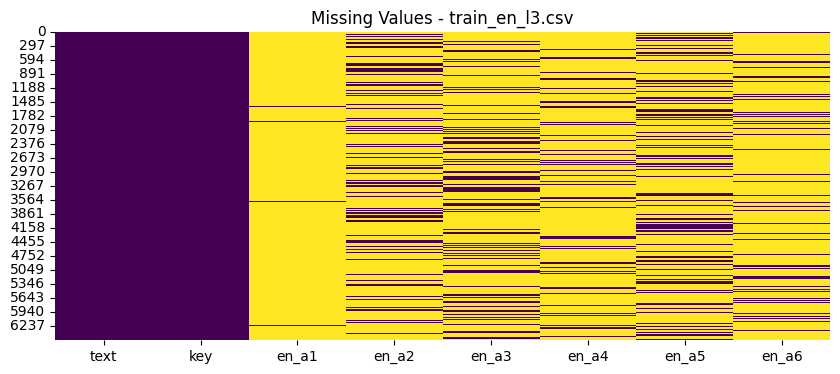


--- en_a1 ---
en_a1
0.0    6495
1.0      36
Name: count, dtype: int64


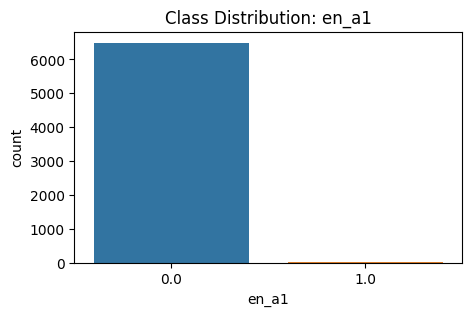

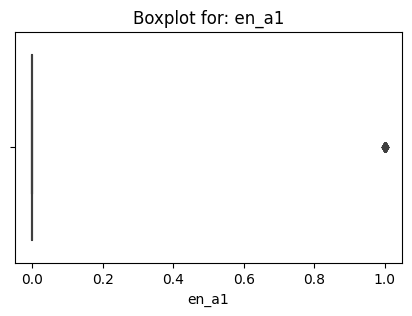


--- en_a2 ---
en_a2
0.0    6122
1.0     409
Name: count, dtype: int64


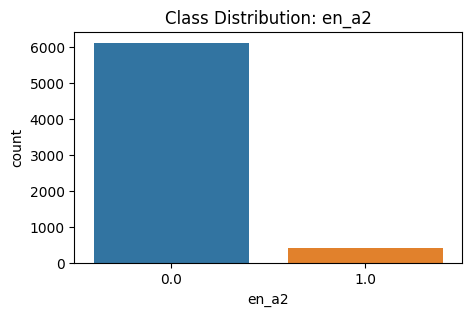

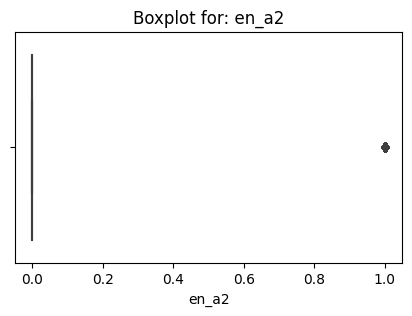


--- en_a3 ---
en_a3
0.0    5701
1.0     830
Name: count, dtype: int64


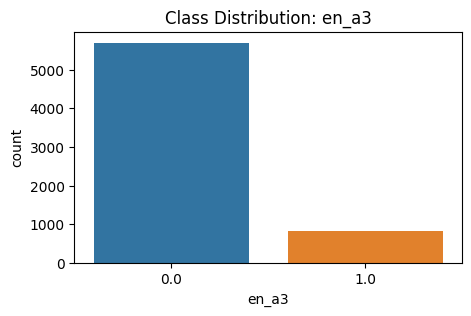

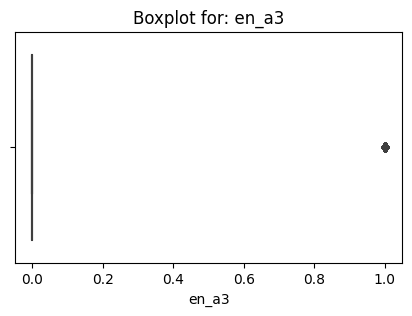


--- en_a4 ---
en_a4
0.0    6401
1.0     129
0.5       1
Name: count, dtype: int64


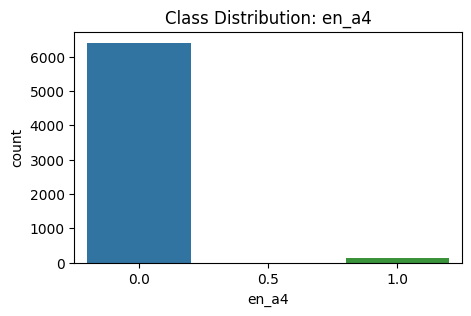

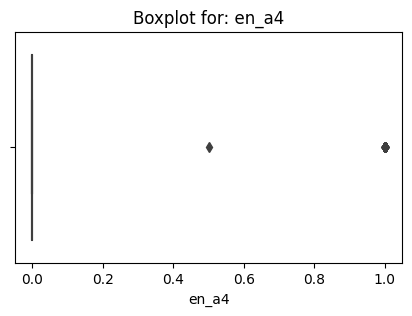


--- en_a5 ---
en_a5
0.0    5988
1.0     543
Name: count, dtype: int64


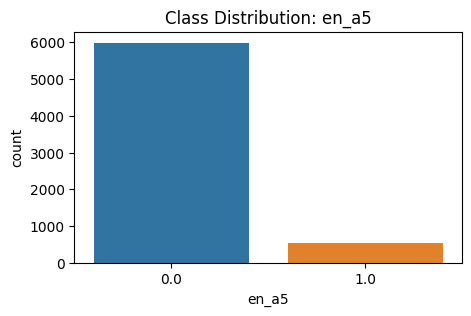

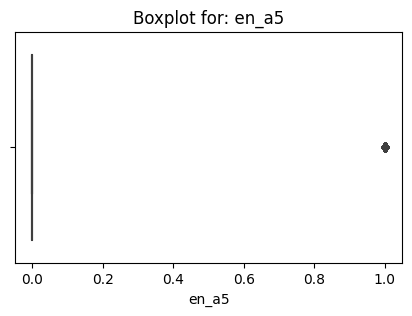


--- en_a6 ---
en_a6
0.0    5985
1.0     546
Name: count, dtype: int64


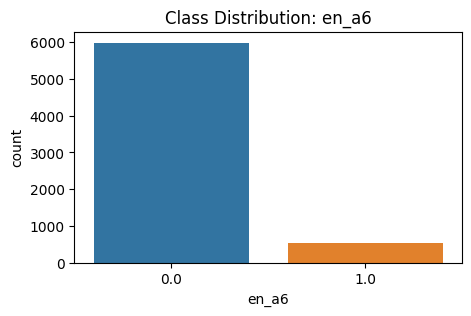

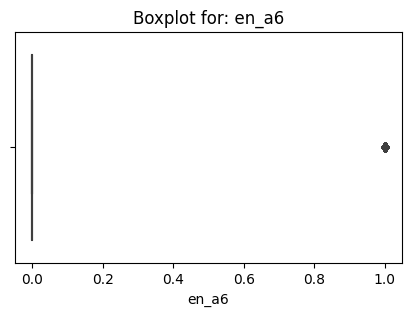

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


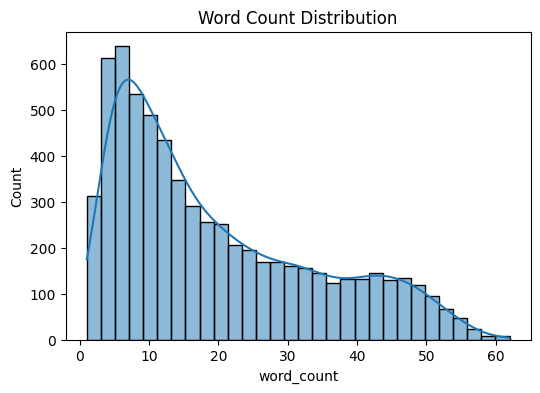

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


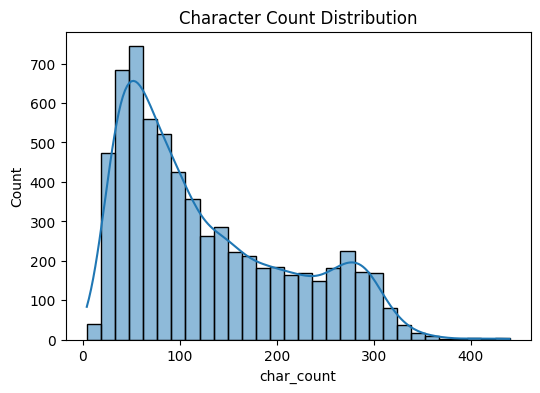

Avg stopwords per text: 6.8107487367937525


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


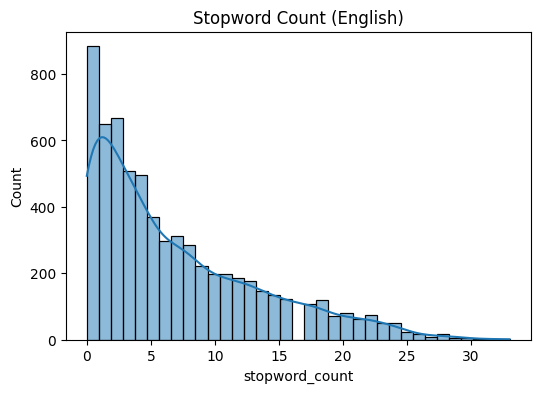

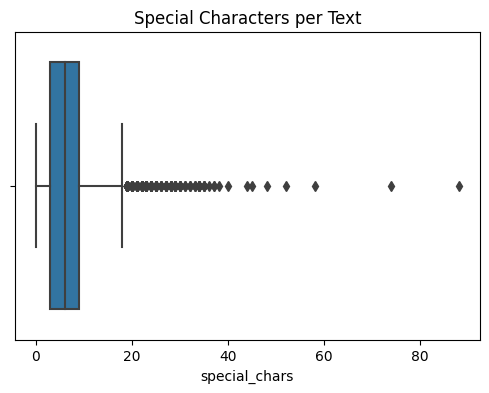

Exact duplicates: 0
Vocabulary size for EN: 23877

===== EDA for train_hi_l1.csv =====

Dataset shape: (6197, 7)

Data types:
 text     object
key      object
hi_a1    object
hi_a2    object
hi_a3    object
hi_a4    object
hi_a5    object
dtype: object

Memory usage:
 Index        128
text     2357879
key       415199
hi_a1     234011
hi_a2     222489
hi_a3     238156
hi_a4     238172
hi_a5     238614
dtype: int64

Sample rows:
                                                    text         key hi_a1  \
1012  <handle replaced><handle replaced><handle repl...  question_1   NaN   
1994  <handle replaced><handle replaced>राजन जी बिल्...  question_1   NaN   
5135  Koi aurat ko giraftar nahi kiya saaheb ne..  s...  question_1   NaN   

     hi_a2 hi_a3 hi_a4 hi_a5  
1012   1.0   NaN   NaN   NaN  
1994   NaN   1.0   NaN   NaN  
5135   NaN   NaN   NaN   1.0  

Missing values:
 text        0
key         0
hi_a1    4921
hi_a2    5332
hi_a3    4773
hi_a4    4773
hi_a5    4757
dtype: int64

Miss

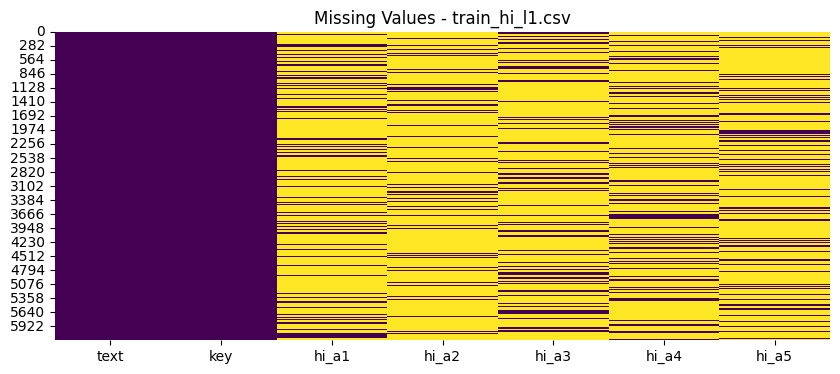


--- hi_a1 ---
hi_a1
0.0    5954
1.0     243
Name: count, dtype: int64


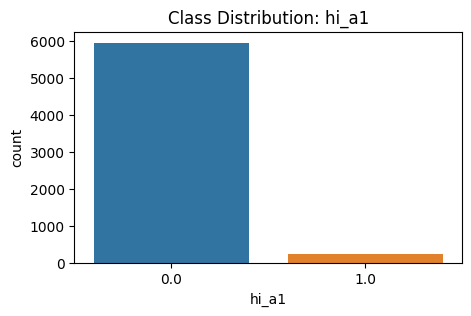

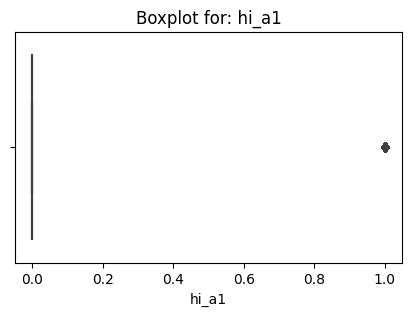


--- hi_a2 ---
hi_a2
0.0    5990
1.0     207
Name: count, dtype: int64


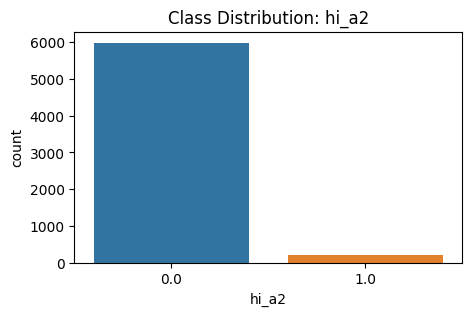

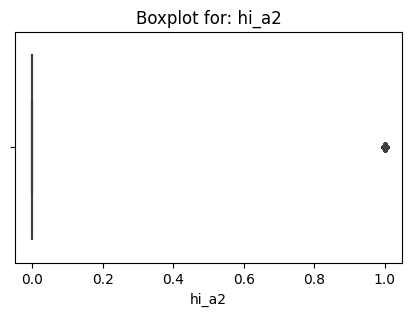


--- hi_a3 ---
hi_a3
0.0    5400
1.0     796
0.5       1
Name: count, dtype: int64


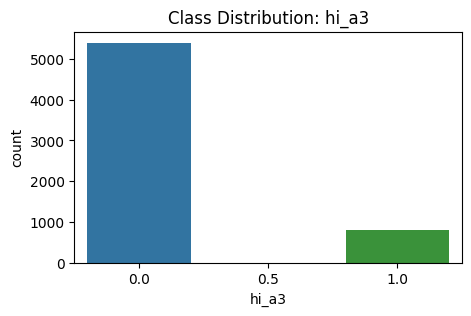

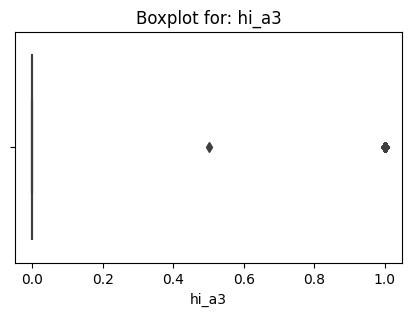


--- hi_a4 ---
hi_a4
0.0    6048
1.0     149
Name: count, dtype: int64


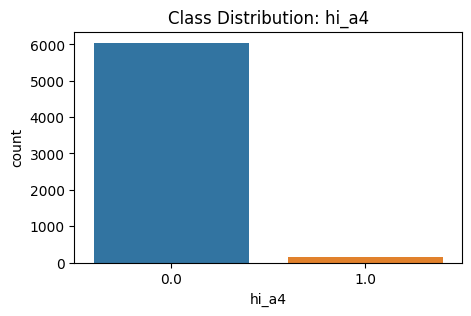

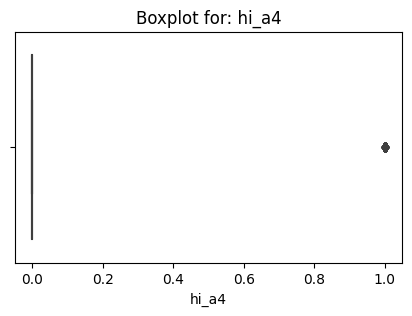


--- hi_a5 ---
hi_a5
0.0    5799
1.0     398
Name: count, dtype: int64


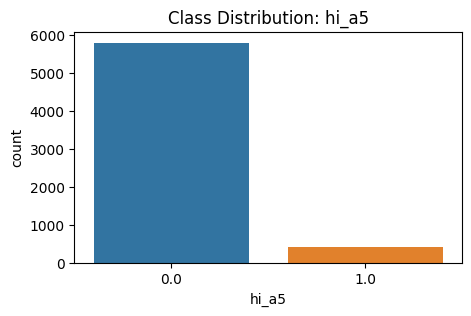

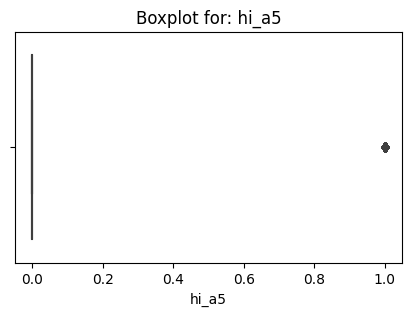

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


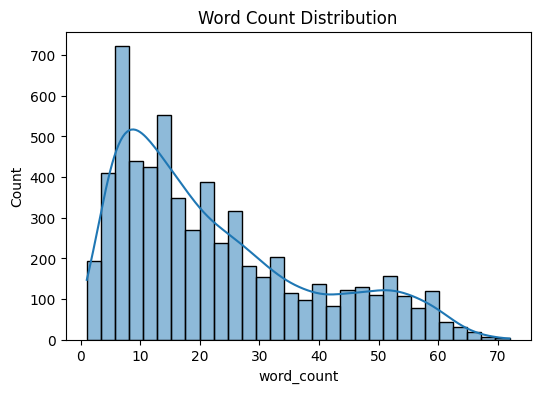

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


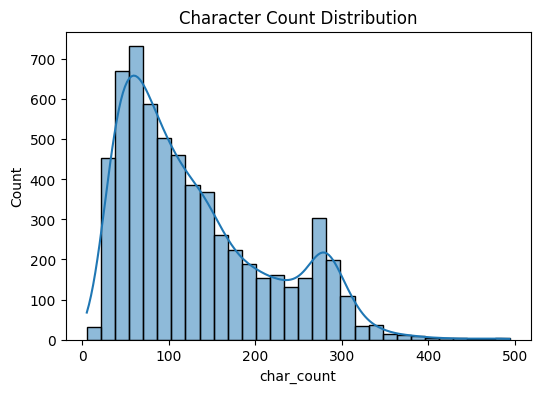

Total Devanagari chars: 387594


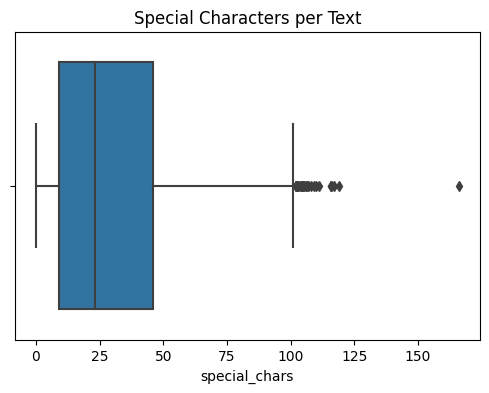

Exact duplicates: 0
Vocabulary size for HI: 27856

===== EDA for train_hi_l2.csv =====

Dataset shape: (6191, 7)

Data types:
 text     object
key      object
hi_a1    object
hi_a2    object
hi_a3    object
hi_a4    object
hi_a5    object
dtype: object

Memory usage:
 Index        128
text     2356010
key       414797
hi_a1     233792
hi_a2     222293
hi_a3     237814
hi_a4     237980
hi_a5     238394
dtype: int64

Sample rows:
                                                    text         key hi_a1  \
3757                             <handle replaced>चल चल  question_2   NaN   
4089  <handle replaced>दादीजी झुंझुनूं की है क्या ये...  question_2   NaN   
1805  <handle replaced><handle replaced>पक्का वाला ज...  question_2   NaN   

     hi_a2 hi_a3 hi_a4 hi_a5  
3757   NaN   NaN   NaN   0.0  
4089   NaN   NaN   NaN   0.0  
1805   NaN   1.0   NaN   NaN  

Missing values:
 text        0
key         0
hi_a1    4916
hi_a2    5326
hi_a3    4772
hi_a4    4767
hi_a5    4752
dtype: int64

Miss

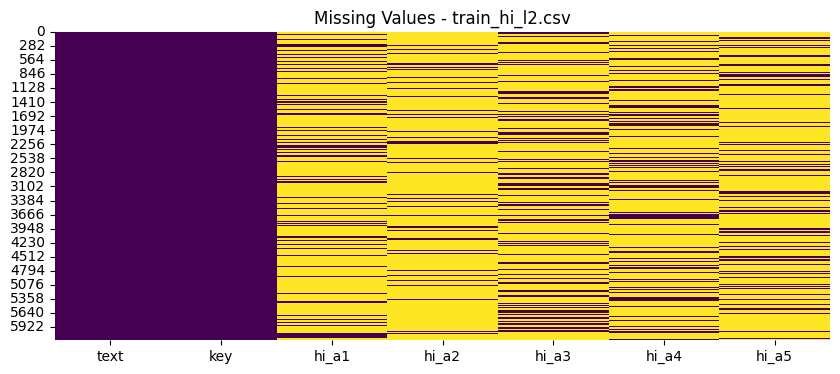


--- hi_a1 ---
hi_a1
0.0    5317
1.0     874
Name: count, dtype: int64


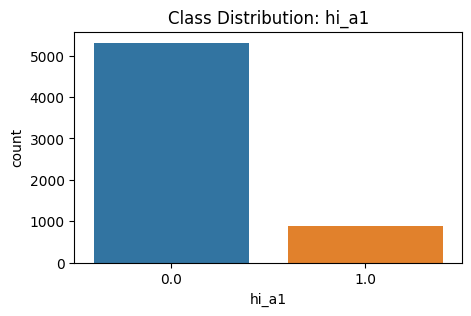

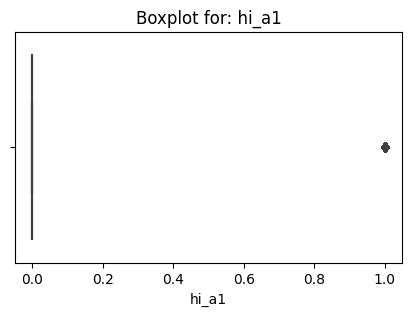


--- hi_a2 ---
hi_a2
0.0    5854
1.0     337
Name: count, dtype: int64


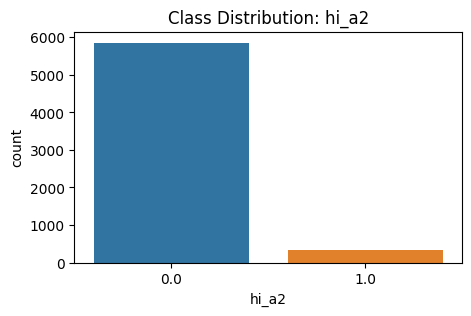

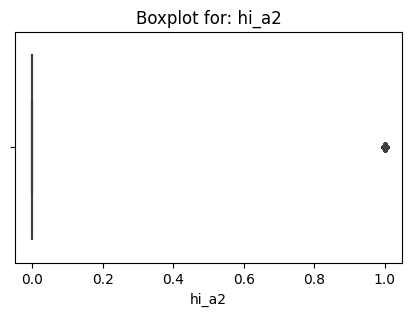


--- hi_a3 ---
hi_a3
0.0    5300
1.0     891
Name: count, dtype: int64


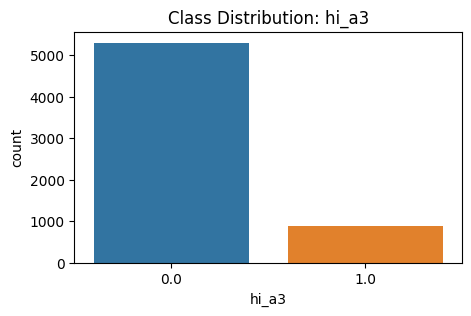

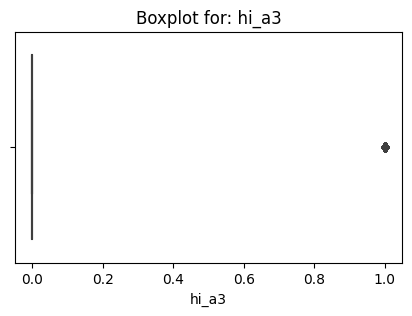


--- hi_a4 ---
hi_a4
0.0    6002
1.0     189
Name: count, dtype: int64


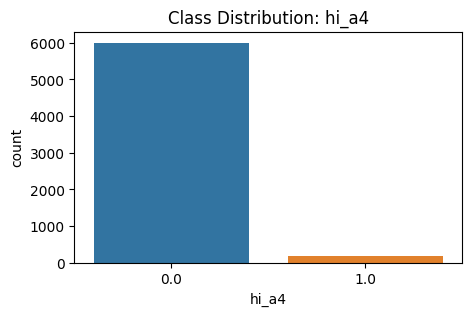

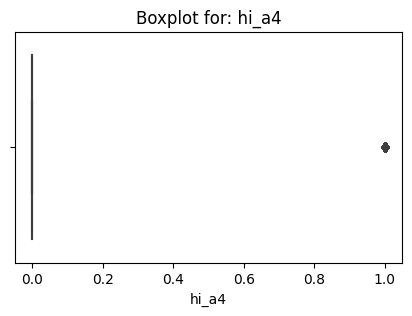


--- hi_a5 ---
hi_a5
0.0    5379
1.0     811
0.5       1
Name: count, dtype: int64


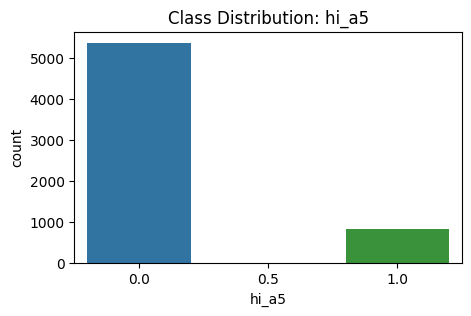

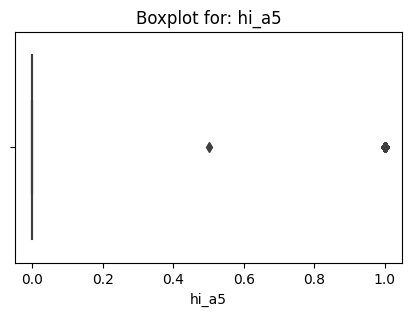

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


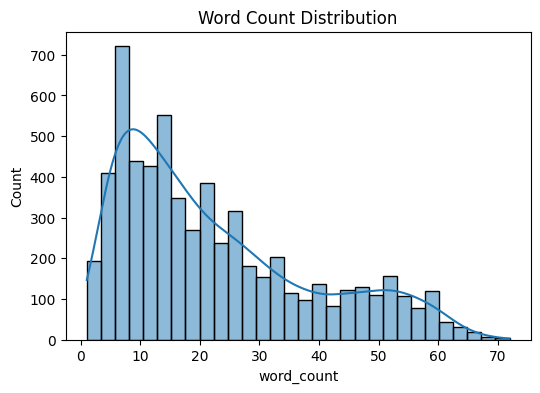

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


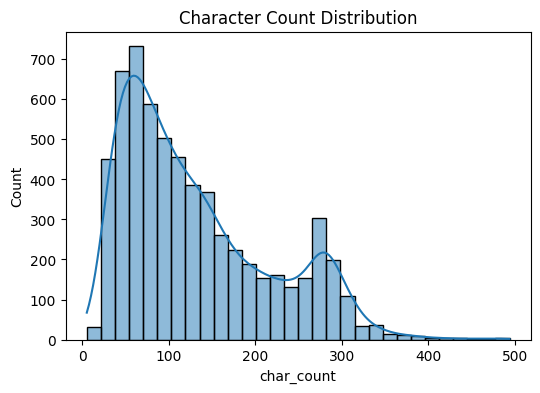

Total Devanagari chars: 387475


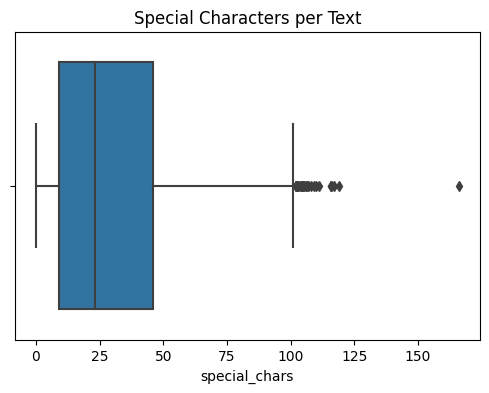

Exact duplicates: 0
Vocabulary size for HI: 27836

===== EDA for train_hi_l3.csv =====

Dataset shape: (6197, 7)

Data types:
 text     object
key      object
hi_a1    object
hi_a2    object
hi_a3    object
hi_a4    object
hi_a5    object
dtype: object

Memory usage:
 Index        128
text     2357927
key       415199
hi_a1     233984
hi_a2     222485
hi_a3     238190
hi_a4     238172
hi_a5     238586
dtype: int64

Sample rows:
                                                    text         key hi_a1  \
583   <handle replaced><handle replaced><handle repl...  question_3   NaN   
1942  <handle replaced><handle replaced>मैडम जी #Mer...  question_3   NaN   
943   <handle replaced><handle replaced><handle repl...  question_3   NaN   

     hi_a2 hi_a3 hi_a4 hi_a5  
583    NaN   NaN   NaN   0.0  
1942   NaN   0.0   NaN   NaN  
943    NaN   NaN   1.0   NaN  

Missing values:
 text        0
key         0
hi_a1    4922
hi_a2    5332
hi_a3    4772
hi_a4    4773
hi_a5    4758
dtype: int64

Miss

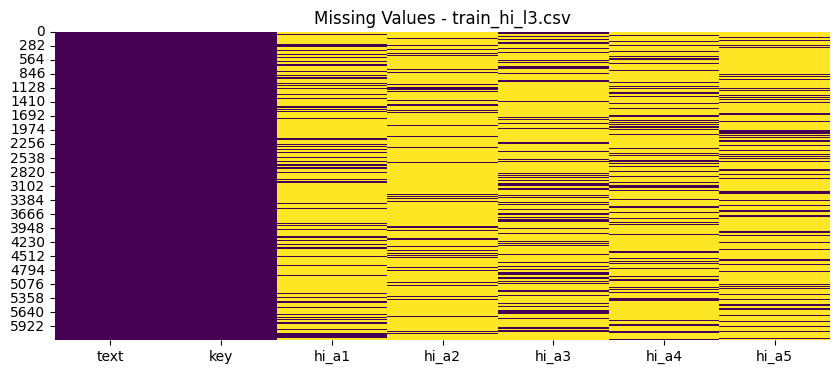


--- hi_a1 ---
hi_a1
0.0    5592
1.0     605
Name: count, dtype: int64


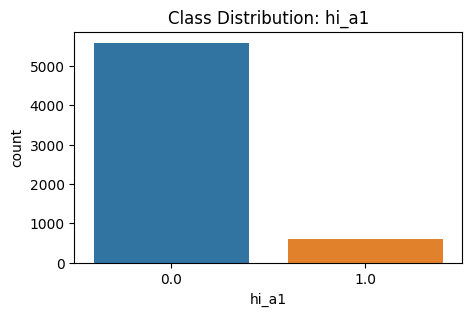

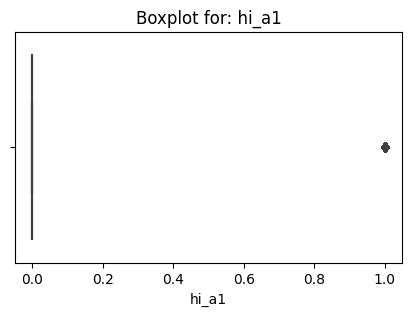


--- hi_a2 ---
hi_a2
0.0    5832
1.0     365
Name: count, dtype: int64


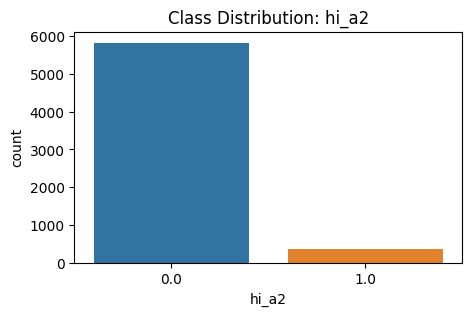

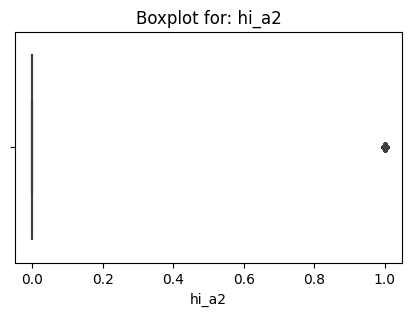


--- hi_a3 ---
hi_a3
0.0    5098
1.0    1099
Name: count, dtype: int64


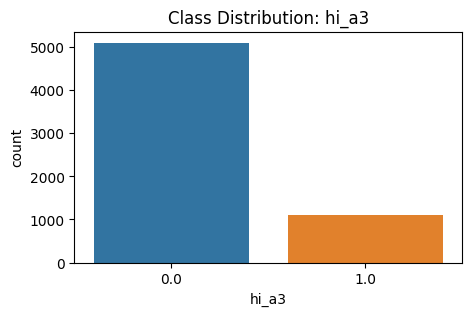

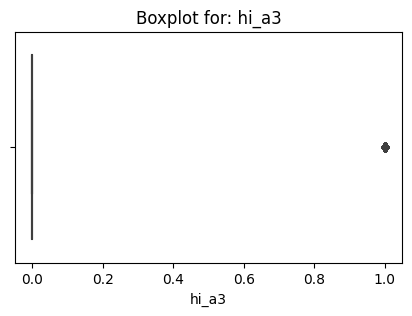


--- hi_a4 ---
hi_a4
0.0    5671
1.0     526
Name: count, dtype: int64


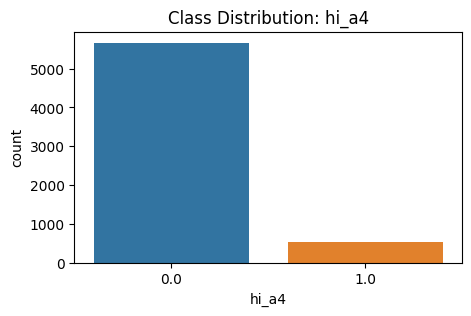

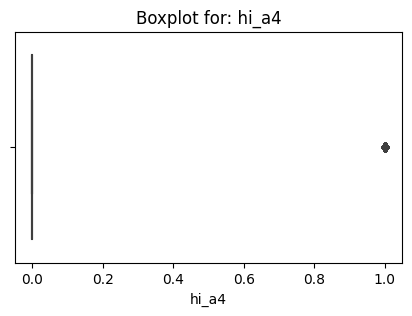


--- hi_a5 ---
hi_a5
0.0    5870
1.0     327
Name: count, dtype: int64


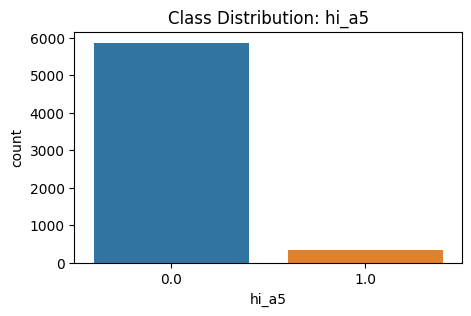

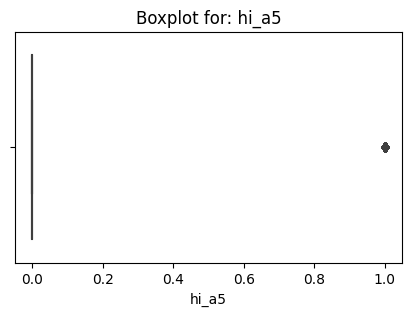

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


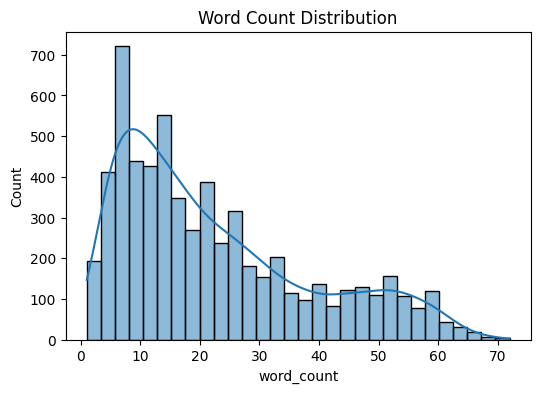

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


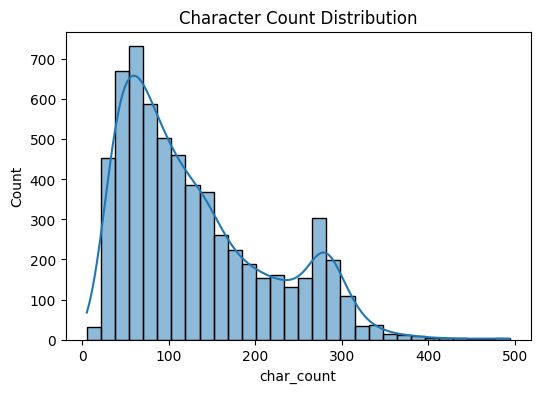

Total Devanagari chars: 387624


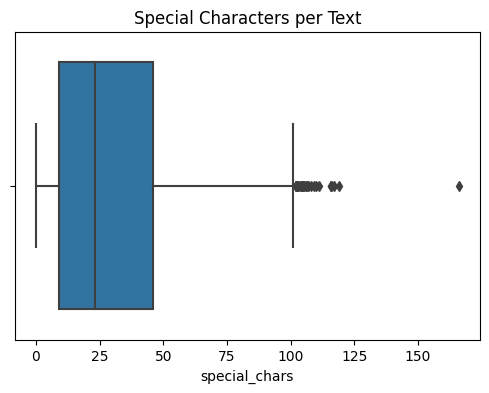

Exact duplicates: 0
Vocabulary size for HI: 27853

===== EDA for train_ta_l1.csv =====

Dataset shape: (6779, 8)

Data types:
 text      object
key       object
ta_a1    float64
ta_a2     object
ta_a3    float64
ta_a4    float64
ta_a5    float64
ta_a6     object
dtype: object

Memory usage:
 Index        128
text     2935904
key       454193
ta_a1      54232
ta_a2     260650
ta_a3      54232
ta_a4      54232
ta_a5      54232
ta_a6     223255
dtype: int64

Sample rows:
                                                    text         key  ta_a1  \
76    #பார்ப்பானும்_பார்ப்பன_அடிமைகளும்,!? அடிமைகளை ...  question_1    NaN   
6074  நேரா வினோத் சுன்னிய ஊம்ப வந்துட்டான் திருட்டுத...  question_1    NaN   
2672                      <handle replaced>சூப்பர் மேம்  question_1    0.0   

     ta_a2  ta_a3  ta_a4  ta_a5 ta_a6  
76     0.0    NaN    NaN    NaN   NaN  
6074   NaN    NaN    NaN    1.0   NaN  
2672   NaN    NaN    NaN    NaN   NaN  

Missing values:
 text        0
key         0
ta_a1  

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


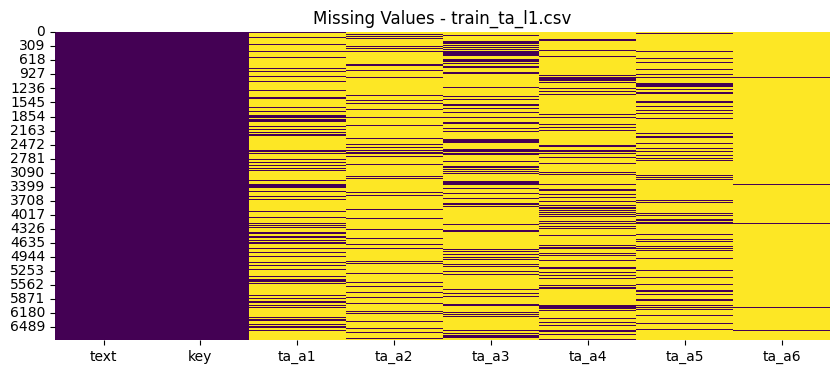


--- ta_a1 ---
ta_a1
0.0    6090
1.0     689
Name: count, dtype: int64


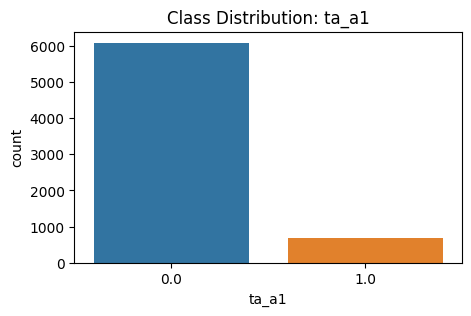

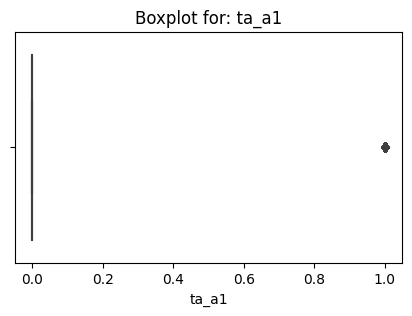


--- ta_a2 ---
ta_a2
0.000000    6177
1.000000     601
0.666667       1
Name: count, dtype: int64


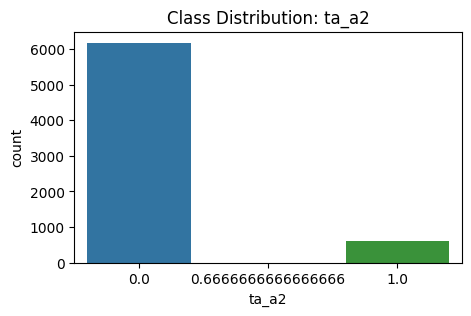

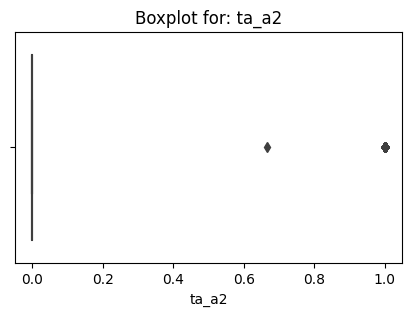


--- ta_a3 ---
ta_a3
0.0    5931
1.0     848
Name: count, dtype: int64


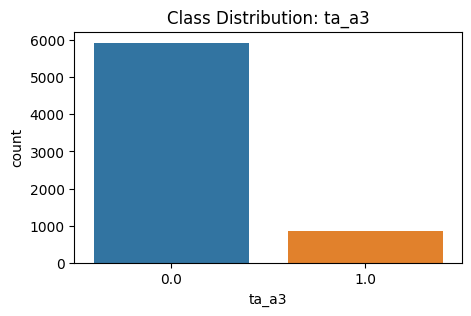

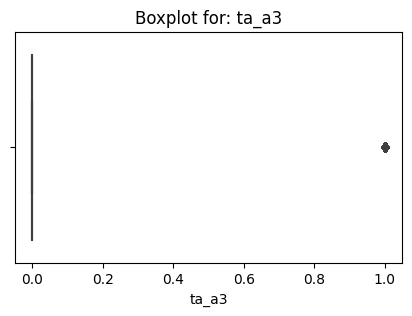


--- ta_a4 ---
ta_a4
0.00    6517
1.00     260
0.50       1
0.75       1
Name: count, dtype: int64


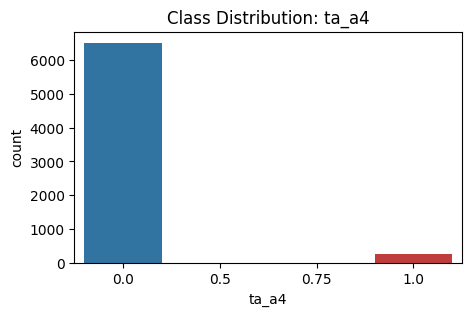

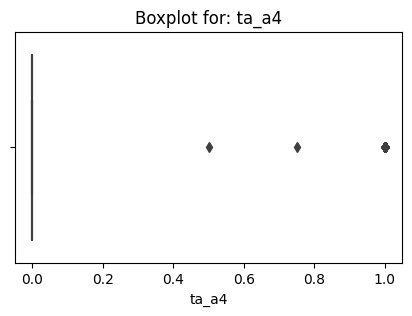


--- ta_a5 ---
ta_a5
0.0    5867
1.0     912
Name: count, dtype: int64


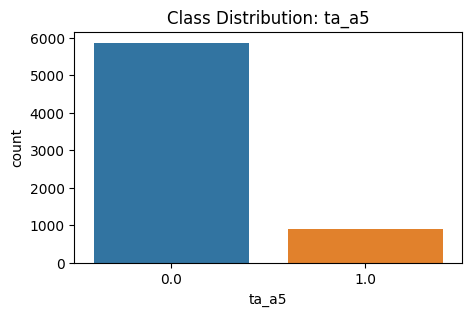

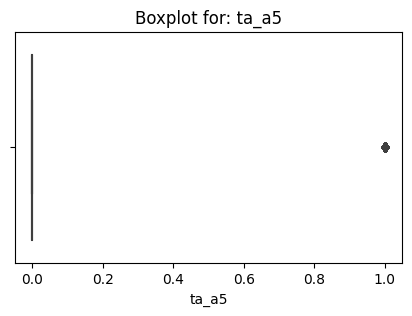


--- ta_a6 ---
ta_a6
0.0    6685
1.0      94
Name: count, dtype: int64


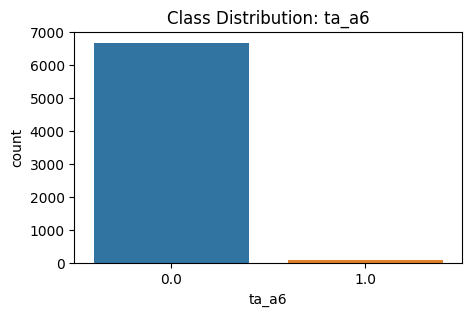

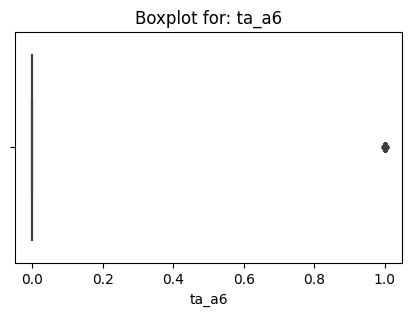

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


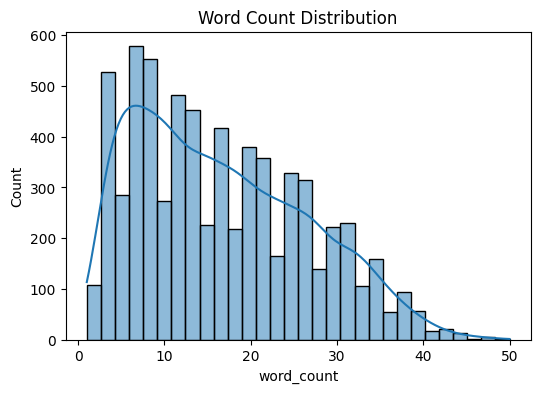

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


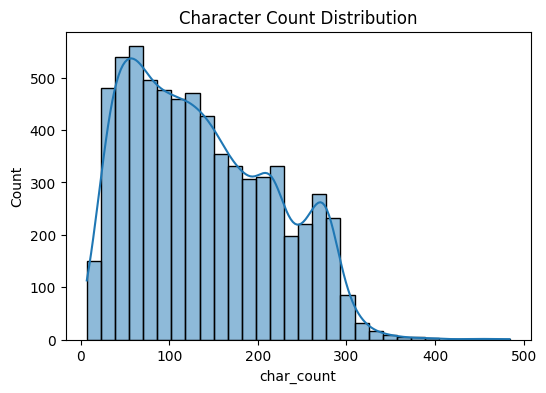

Total Tamil chars: 669259


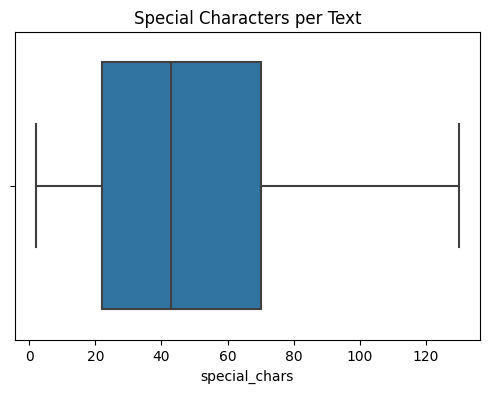

Exact duplicates: 0
Vocabulary size for TA: 39908

===== EDA for train_ta_l2.csv =====

Dataset shape: (6778, 8)

Data types:
 text      object
key       object
ta_a1     object
ta_a2     object
ta_a3     object
ta_a4    float64
ta_a5    float64
ta_a6     object
dtype: object

Memory usage:
 Index        128
text     2935634
key       454126
ta_a1     260069
ta_a2     260602
ta_a3     256319
ta_a4      54224
ta_a5      54224
ta_a6     223223
dtype: int64

Sample rows:
                                                    text         key ta_a1  \
2828  <handle replaced>தத்தை தத்தை தத்தை பல அத்தை பெ...  question_2   NaN   
4167  இந்த டேக் #முட்டாள்கோவையனுங்க புந்தைகளா   நாங்...  question_2   NaN   
6548  லவ் பண்ணற பொண்ணு பேசாம போனா பீல் பண்ணாதீங்க டா...  question_2   NaN   

     ta_a2 ta_a3  ta_a4  ta_a5 ta_a6  
2828   1.0   NaN    NaN    NaN   NaN  
4167   1.0   NaN    NaN    NaN   NaN  
6548   NaN   1.0    NaN    NaN   NaN  

Missing values:
 text        0
key         0
ta_a1    5236
t

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


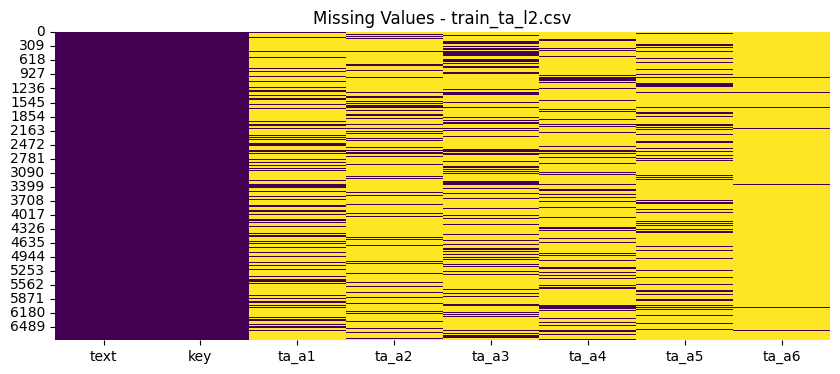


--- ta_a1 ---
ta_a1
0.0    5628
1.0    1150
Name: count, dtype: int64


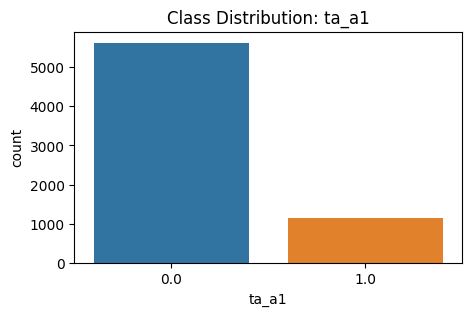

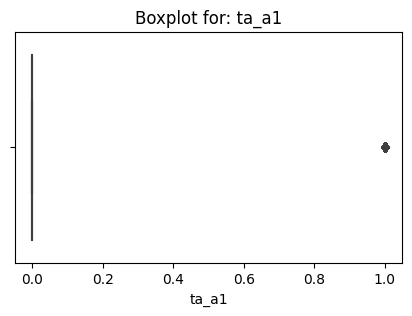


--- ta_a2 ---
ta_a2
0.0    5808
1.0     970
Name: count, dtype: int64


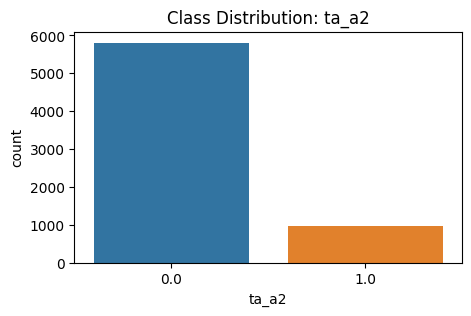

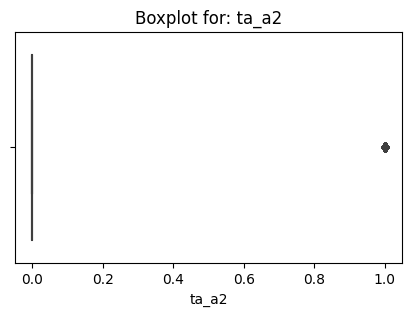


--- ta_a3 ---
ta_a3
0.0    5905
1.0     873
Name: count, dtype: int64


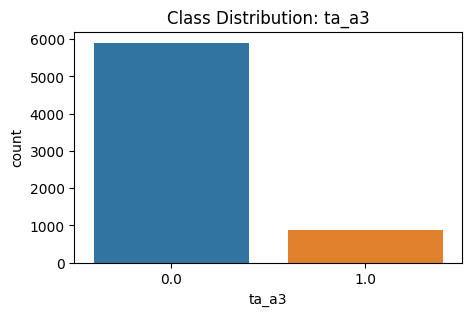

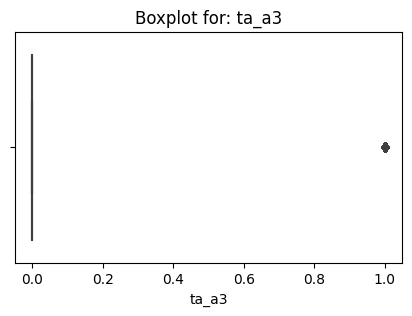


--- ta_a4 ---
ta_a4
0.0    6502
1.0     276
Name: count, dtype: int64


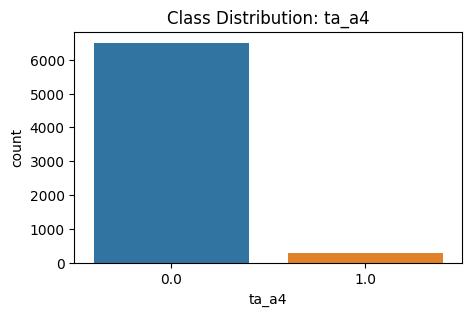

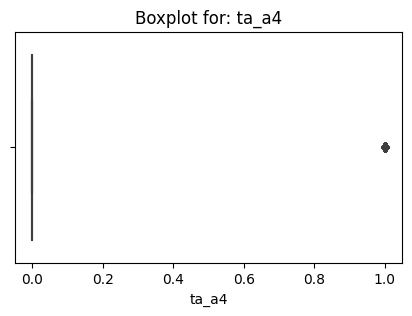


--- ta_a5 ---
ta_a5
0.0    6019
1.0     759
Name: count, dtype: int64


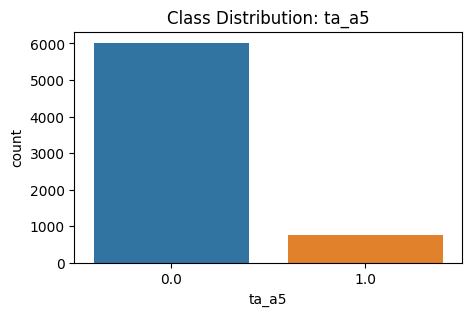

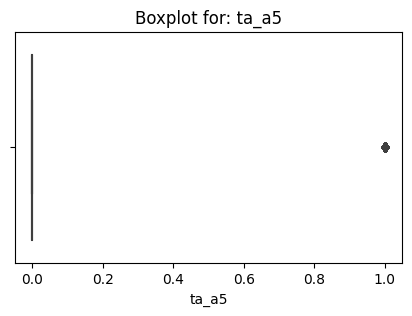


--- ta_a6 ---
ta_a6
0.0    6649
1.0     129
Name: count, dtype: int64


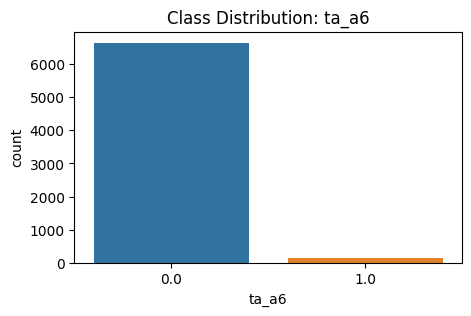

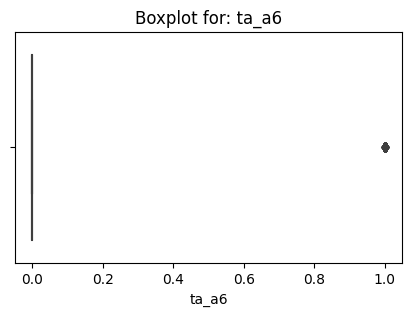

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


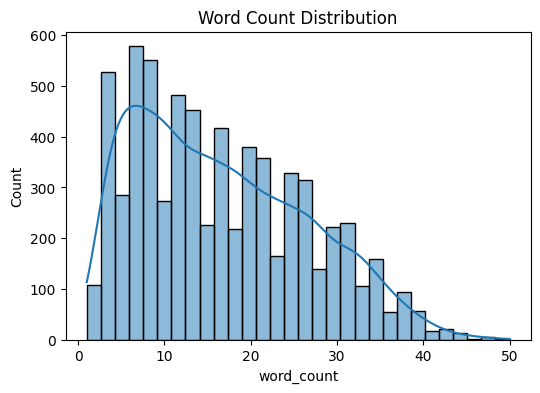

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


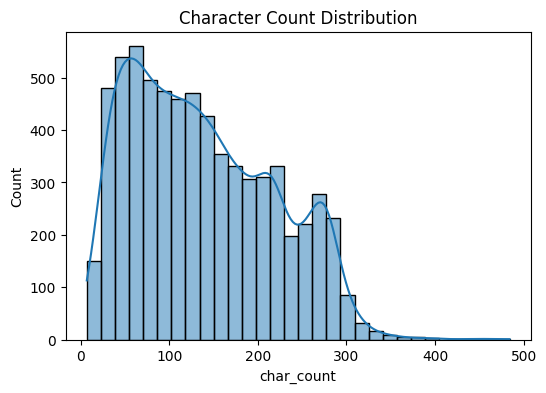

Total Tamil chars: 669224


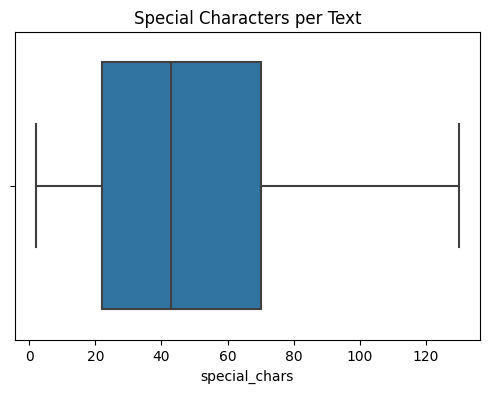

Exact duplicates: 0
Vocabulary size for TA: 39907

===== EDA for train_ta_l3.csv =====

Dataset shape: (6779, 8)

Data types:
 text      object
key       object
ta_a1     object
ta_a2    float64
ta_a3    float64
ta_a4     object
ta_a5    float64
ta_a6     object
dtype: object

Memory usage:
 Index        128
text     2935904
key       454193
ta_a1     260125
ta_a2      54232
ta_a3      54232
ta_a4     261419
ta_a5      54232
ta_a6     223254
dtype: int64

Sample rows:
                                                    text         key ta_a1  \
4972                                        கல்லு யா நீ  question_3   NaN   
5992  நாம என்ன சொல்றமோ அதுக்கு எதிராதான் ட்விட்டர் ஜ...  question_3   1.0   
99    1 இன்ச்ல சிக்ஸ் மிஷம்..யார்ரா அவன் பவுளர் ஈமு ...  question_3   NaN   

      ta_a2  ta_a3 ta_a4  ta_a5 ta_a6  
4972    0.0    NaN   NaN    NaN   NaN  
5992    1.0    NaN   0.0    NaN   1.0  
99      NaN    NaN   0.0    NaN   NaN  

Missing values:
 text        0
key         0
ta_a1    52

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


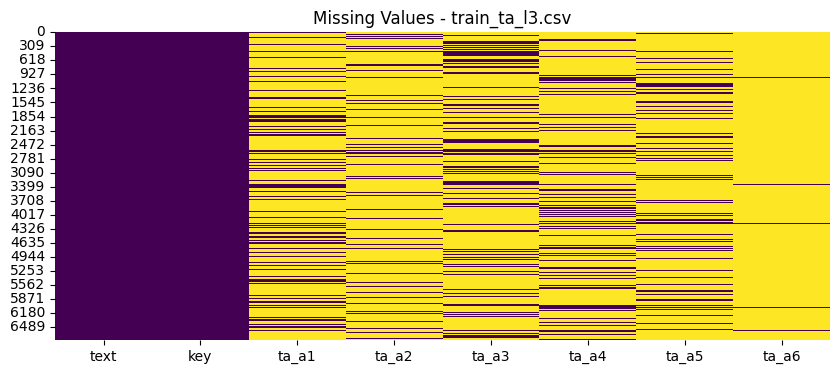


--- ta_a1 ---
ta_a1
0.0    5720
1.0    1059
Name: count, dtype: int64


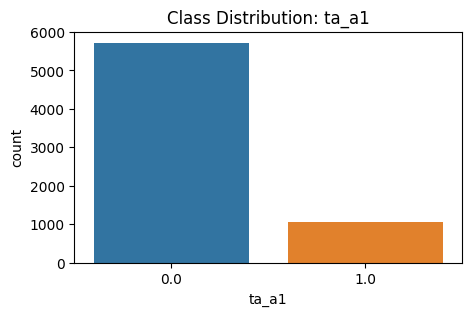

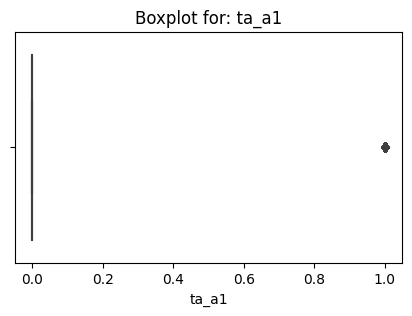


--- ta_a2 ---
ta_a2
0.0    5740
1.0    1039
Name: count, dtype: int64


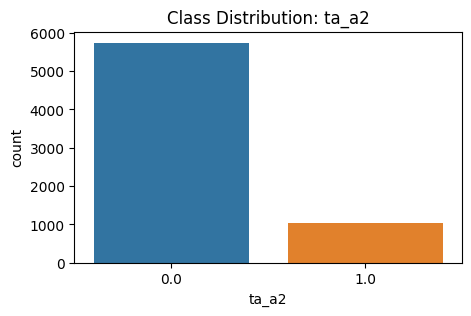

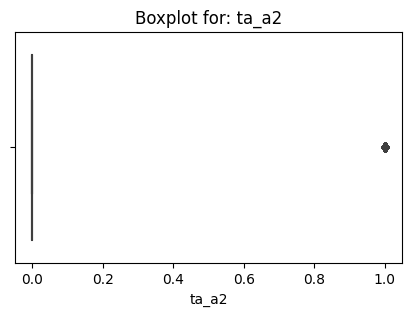


--- ta_a3 ---
ta_a3
0.0    5793
1.0     986
Name: count, dtype: int64


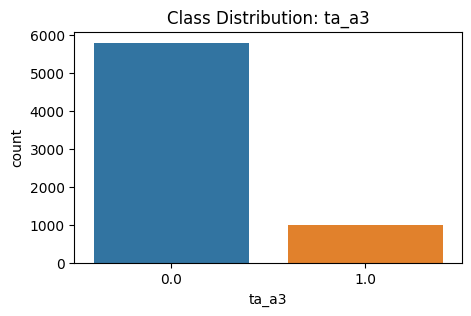

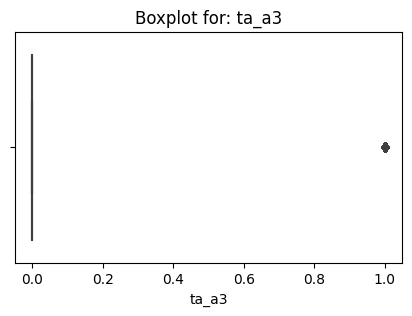


--- ta_a4 ---
ta_a4
0.0    6043
1.0     736
Name: count, dtype: int64


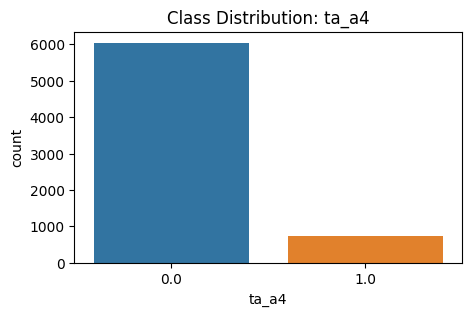

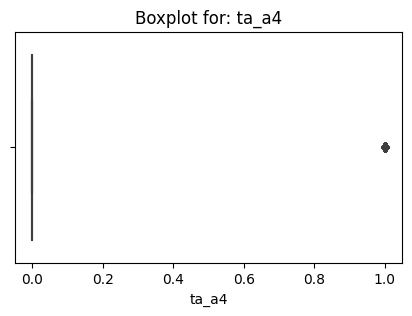


--- ta_a5 ---
ta_a5
0.0    5658
1.0    1121
Name: count, dtype: int64


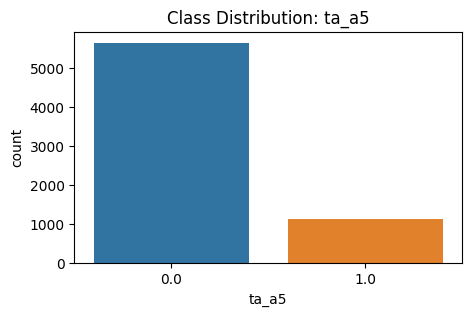

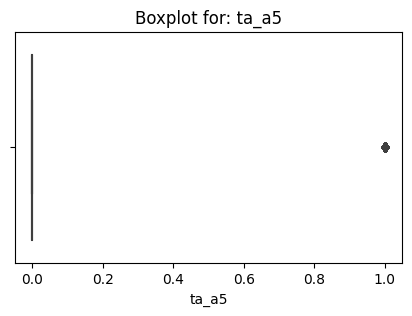


--- ta_a6 ---
ta_a6
0.0    6627
1.0     152
Name: count, dtype: int64


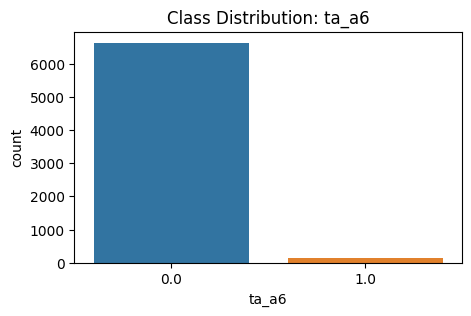

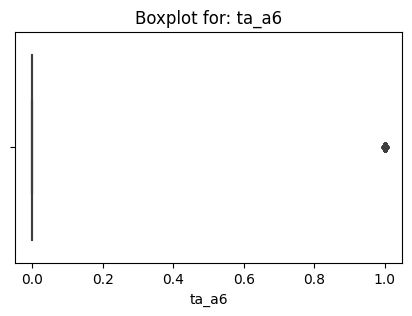

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


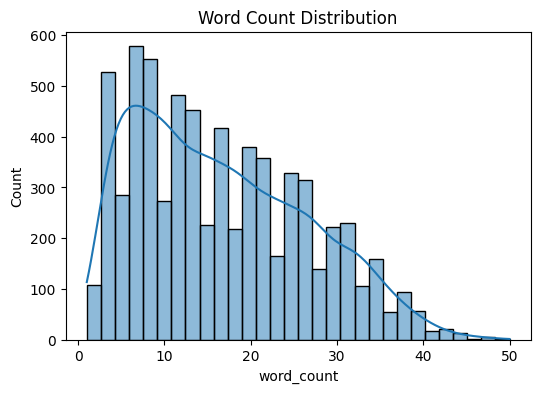

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


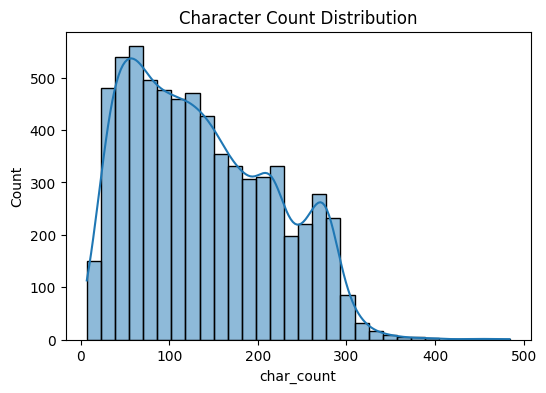

Total Tamil chars: 669259


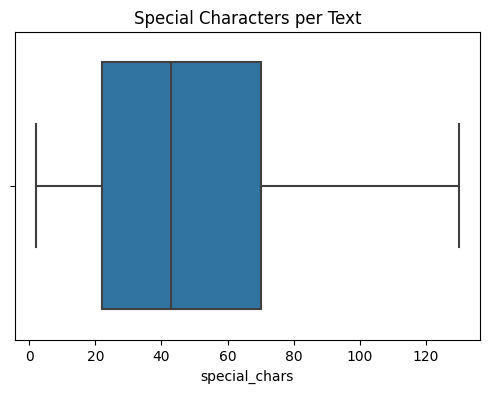

Exact duplicates: 0
Vocabulary size for TA: 39908


In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import regex
from collections import defaultdict
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

def perform_eda(file_path, lang):
    print(f"\n===== EDA for {os.path.basename(file_path)} =====")
    df = pd.read_csv(file_path)

    print(f"\nDataset shape: {df.shape}")
    print("\nData types:\n", df.dtypes)
    print("\nMemory usage:\n", df.memory_usage(deep=True))
    print("\nSample rows:\n", df.sample(3))


    missing = df.isnull().sum()
    print("\nMissing values:\n", missing)
    print("\nMissing %:\n", (missing / len(df)) * 100)

 
    plt.figure(figsize=(10, 4))
    sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
    plt.title(f"Missing Values - {os.path.basename(file_path)}")
    plt.show()


    target_cols = [col for col in df.columns if col.startswith(lang + "_a")]
    df[target_cols] = df[target_cols].replace('NL', None).apply(pd.to_numeric, errors='coerce').fillna(0)

    for col in target_cols:
        print(f"\n--- {col} ---")
        print(df[col].value_counts(dropna=False))

        plt.figure(figsize=(5, 3))
        sns.countplot(data=df, x=col)
        plt.title(f"Class Distribution: {col}")
        plt.show()

        plt.figure(figsize=(5, 3))
        sns.boxplot(data=df, x=col)
        plt.title(f"Boxplot for: {col}")
        plt.show()


    df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
    df['char_count'] = df['text'].apply(lambda x: len(str(x)))


    plt.figure(figsize=(6, 4))
    sns.histplot(df['word_count'], kde=True, bins=30)
    plt.title("Word Count Distribution")
    plt.show()


    plt.figure(figsize=(6, 4))
    sns.histplot(df['char_count'], kde=True, bins=30)
    plt.title("Character Count Distribution")
    plt.show()


    if lang == "en":
        eng_stopwords = set(stopwords.words('english'))
        df['stopword_count'] = df['text'].apply(
            lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords])
        )
        print("Avg stopwords per text:", df['stopword_count'].mean())

        plt.figure(figsize=(6, 4))
        sns.histplot(df['stopword_count'], kde=True)
        plt.title("Stopword Count (English)")
        plt.show()


    if lang == "hi":
        script_chars = regex.findall(r'[\p{Devanagari}]', ' '.join(df['text']))
        print(f"Total Devanagari chars: {len(script_chars)}")
    elif lang == "ta":
        script_chars = regex.findall(r'[\p{Tamil}]', ' '.join(df['text']))
        print(f"Total Tamil chars: {len(script_chars)}")


    df['special_chars'] = df['text'].apply(lambda x: len(re.findall(r'[^\w\s]', str(x))))

    plt.figure(figsize=(6, 4))
    sns.boxplot(x='special_chars', data=df)
    plt.title("Special Characters per Text")
    plt.show()


    print("Exact duplicates:", df.duplicated().sum())


    vocab = set(word.lower() for text in df['text'] for word in str(text).split())
    print(f"Vocabulary size for {lang.upper()}: {len(vocab)}")

    return df


base_path = "/kaggle/input/uli-dataset/uli_dataset-main/training"
file_langs = {
    "train_en_l1.csv": "en",
    "train_en_l2.csv": "en",
    "train_en_l3.csv": "en",
    "train_hi_l1.csv": "hi",
    "train_hi_l2.csv": "hi",
    "train_hi_l3.csv": "hi",
    "train_ta_l1.csv": "ta",
    "train_ta_l2.csv": "ta",
    "train_ta_l3.csv": "ta"
}

dfs = {}
for filename, lang in file_langs.items():
    file_path = os.path.join(base_path, filename)
    df = perform_eda(file_path, lang)
    dfs[filename] = df


Pre-Processing

In [12]:
import os
import sys
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from collections import defaultdict
from nltk.corpus.reader import WordNetCorpusReader
import warnings  # Import warnings module to suppress warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)


NLTK_DATA_PATH = "/kaggle/input/pre-processing/punkt"
WORDNET_PATH = "/kaggle/input/pre-processing/wordnet/wordnet"

nltk.data.path.append(NLTK_DATA_PATH)

wn_reader = WordNetCorpusReader(WORDNET_PATH, None)


try:
    word_tokenize("Test") 
    print(" NLTK 'punkt' tokenizer is working!")
except LookupError:
    print(" NLTK 'punkt' not found! Please ensure it is available locally.")


INDIC_NLP_LIB_PATH = "/kaggle/input/indic-nlp/indic_nlp_library-master/indic_nlp_library-master"
sys.path.insert(0, INDIC_NLP_LIB_PATH)


from indicnlp.tokenize import indic_tokenize
from indicnlp.normalize.indic_normalize import IndicNormalizerFactory
print(" Indic NLP Library loaded successfully!")


stopwords_dir = "/kaggle/input/pre-processing/stopwords/stopwords"
english_stopwords_path = os.path.join(stopwords_dir, "english")
with open(english_stopwords_path, "r", encoding="utf-8") as f:
    english_stopwords = set(f.read().splitlines())


STOPWORDS = {
    "en": english_stopwords,
    "hi": {"के", "का", "की", "से", "में", "पर", "और", "को", "है", "यह", "भारत", "में", "पर", "लेने", "वापस", "तीन", "किसान", "कानून", "बिल"},
    "ta": {"இந்த", "அது", "நாம்", "என்று", "மற்றும்", "இங்கு", "முரசொலி", "அலுவலகம்", "அமைந்துள்ள", "இடம்", "பஞ்சமி"}
}


def load_exception_list(filepath):
    exc_dict = defaultdict(set)
    if os.path.exists(filepath):
        with open(filepath, "r", encoding="utf-8") as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) > 1:
                    exc_dict[parts[0]].update(parts[1:])
    return exc_dict

adj_exc = load_exception_list(os.path.join(WORDNET_PATH, "adj.exc"))
adv_exc = load_exception_list(os.path.join(WORDNET_PATH, "adv.exc"))

def lemmatize(word, pos="noun"):
    if pos == "adj" and word in adj_exc:
        return list(adj_exc[word])[0]]
    elif pos == "adv" and word in adv_exc:
        return list(adv_exc[word])[0]
    return word  


normalizer_factory = IndicNormalizerFactory()
hi_normalizer = normalizer_factory.get_normalizer("hi")
ta_normalizer = normalizer_factory.get_normalizer("ta")


def detect_language(filename):
    if "_en_" in filename:
        return "en"
    elif "_hi_" in filename:
        return "hi"
    elif "_ta_" in filename:
        return "ta"
    return "unknown"

def preprocess_text(text, lang):
    if not isinstance(text, str) or len(text) == 0:
        return ""

    text = text.lower()  

    if lang == "hi":
        text = hi_normalizer.normalize(text)
    elif lang == "ta":
        text = ta_normalizer.normalize(text)


    if lang == "en":
        tokens = word_tokenize(text)
    else:
        tokens = text.split()  

    tokens = [word for word in tokens if word.isalnum() and word not in STOPWORDS.get(lang, set())]


    if lang == "en":
        tokens = [lemmatize(word, "adj") for word in tokens]

    return " ".join(tokens)


DATASET_PATH = "/kaggle/input/uli-dataset/uli_dataset-main/training"


train_files = [
    "train_en_l1.csv", "train_en_l2.csv", "train_en_l3.csv",
    "train_hi_l1.csv", "train_hi_l2.csv", "train_hi_l3.csv",
    "train_ta_l1.csv", "train_ta_l2.csv", "train_ta_l3.csv"
]

processed_data = []
for file in train_files:
    file_path = os.path.join(DATASET_PATH, file)
    lang = detect_language(file)  # Detect language
    print(f"Processing file: {file} | Detected language: {lang}")  # Debugging: Print file and language


    df = pd.read_csv(file_path)


    if "text" in df.columns:
        df["clean_text"] = df["text"].apply(lambda x: preprocess_text(x, lang))


    if lang in ["hi", "ta"]:
        print(f"Sample preprocessed text for {lang}:")
        print(df[["text", "clean_text"]].head(2))  
        print("\n")  

    processed_data.append(df)

final_df = pd.concat(processed_data, ignore_index=True)

final_df.to_csv("/kaggle/working/preprocessed_data.csv", index=False)

print(final_df.head())

✅ NLTK 'punkt' tokenizer is working!
✅ Indic NLP Library loaded successfully!
Processing file: train_en_l1.csv | Detected language: en
Processing file: train_en_l2.csv | Detected language: en
Processing file: train_en_l3.csv | Detected language: en
Processing file: train_hi_l1.csv | Detected language: hi
Sample preprocessed text for hi:
                                                text   clean_text
0    भारत में तीन किसान कानून बिल वापस लेने पर भक...  अब अब तक घर
1    राजस्थान  अजीबोगरीब: गांव की खुशहाली के लिए ...           भर


Processing file: train_hi_l2.csv | Detected language: hi
Sample preprocessed text for hi:
                                                text   clean_text
0    भारत में तीन किसान कानून बिल वापस लेने पर भक...  अब अब तक घर
1    राजस्थान  अजीबोगरीब: गांव की खुशहाली के लिए ...           भर


Processing file: train_hi_l3.csv | Detected language: hi
Sample preprocessed text for hi:
                                                text   clean_text
0    भारत में त

In [13]:

print("Current columns:", df.columns.tolist()) 
annotator_cols = ['ta_a1', 'ta_a2', 'ta_a3']
df[annotator_cols] = df[annotator_cols].replace(['NL', 'nl', 'Nl'], 0).fillna(0)
df[annotator_cols] = df[annotator_cols].apply(pd.to_numeric, errors='coerce').fillna(0)

df['label'] = (df[annotator_cols].sum(axis=1) >= 2).astype(int)
data = df[['text', 'label']].copy()

print("\nLabel distribution:")
print(data['label'].value_counts())

Current columns: ['text', 'key', 'ta_a1', 'ta_a2', 'ta_a3', 'ta_a4', 'ta_a5', 'ta_a6', 'clean_text']

Label distribution:
label
0    6596
1     183
Name: count, dtype: int64
